## INTRODUCTION
#### Customer Personality Analysis is a crucial process that helps businesses gain deeper insights into their ideal customers. By understanding specific needs, behaviors, and concerns of different customer segments, companies can tailor their products and marketing strategies effectively. Instead of broadly targeting all customers, businesses can focus on segments most likely to purchase new products, optimizing both marketing efforts and resource allocation.

### Step 1: Import the requirements.  

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import datetime
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [40]:
# reading the file
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Check Dataset Information

In [41]:
print(f'Number of dataset rows: {df.shape[0]}\nNumber of dataset columns: {df.shape[1]}')

Number of dataset rows: 2240
Number of dataset columns: 29


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [11]:
df.isnull()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Observation

#### There are 3 variables with data object types, namely Education, Marital_Status, and Dt_Customer:
#### Education has 5 unique values. Will be grouped into simpler groups
#### Marital_Status there are 8 unique values. Will be grouped into simpler groups
#### Dt_Customer will be converted to the datetime type.
#### Other variables are in the form of numerical data (integer / float).

## Check Duplicate Data

In [44]:
print(f' The amount of data that has duplicates: {df.duplicated().sum()}')

 The amount of data that has duplicates: 0


## Check Missing & Unique Values

In [45]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(2).values
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values
0,ID,0,0.00,2240,"[5453, 8685]"
1,Year_Birth,0,0.00,59,"[1984, 1993]"
2,Education,0,0.00,5,"[Graduation, Graduation]"
3,Marital_Status,0,0.00,8,"[Married, Together]"
4,Income,24,1.07,1974,"[57912.0, 37697.0]"
5,Kidhome,0,0.00,3,"[1, 0]"
6,Teenhome,0,0.00,3,"[2, 1]"
7,Dt_Customer,0,0.00,663,"[10-01-2013, 07-01-2013]"
8,Recency,0,0.00,100,"[81, 93]"
9,MntWines,0,0.00,776,"[4, 333]"


### Observation

##### Income has a missing value of 24 lines (1.07%).
##### Z_CostContact and Z_Revenue have the same value on each row.

### Handling Missing Values
##### To deal with missing value, there are 2 ways that can be done:

##### Fill in the missing value
##### Removing missing values
##### Because the number of missing values in this dataset (var. Income) is relatively low (1.07%), so I will remove the missing value in this variable.

In [46]:
df = df.dropna()
print(f'Current amount of missing value: {df.isna().sum().sum()}')

Current amount of missing value: 0


### Drop Irrelevant Columns

##### In this dataset, it was found that Z_CostContact and Z_Revenue have the same value in each row and are irrelevant to the dataset. So I will drop the two columns.

In [47]:
# Removing irrelevant columns

df = df.drop(['Z_CostContact','Z_Revenue'],axis=1)

### Column Year Birth

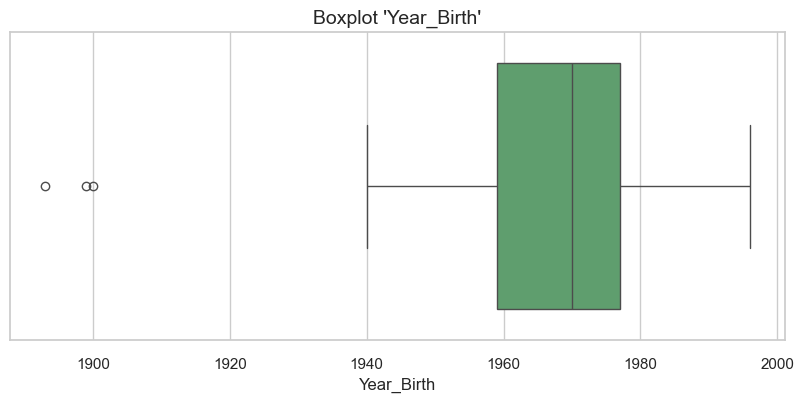

In [48]:
# Check outlier
sns.set_theme(style='whitegrid')

plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Year_Birth',color='g')
plt.title("Boxplot 'Year_Birth'",size=14);

In [54]:
clean_df = df.drop(df[(df['Year_Birth'] < 1935) |
                      (df['Income'] > 175000)].index)
clean_df['Income'].fillna(clean_df['Income'].median(), inplace=True)

C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\800701424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Income'].fillna(clean_df['Income'].median(), inplace=True)


In [57]:
clean_df['Total_Expenditure'] = clean_df.filter(like='Mnt').sum(axis=1)
clean_df['Total_Purchases'] = clean_df.filter(regex='Num[^Deals].+Purchases').sum(axis=1)

C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\3209536464.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


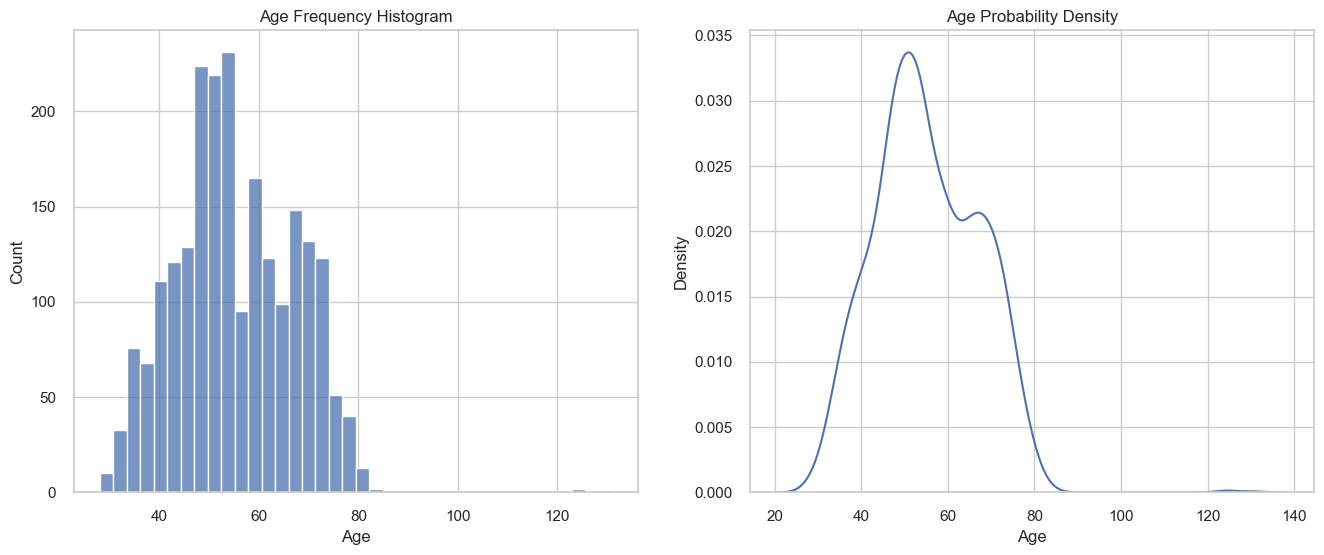

In [58]:
fig, axes = plt.subplots(1,2,figsize=(16,6))
currentYear = datetime.datetime.now()
df['Age'] = currentYear.year - df['Year_Birth']
sns.histplot(df['Age'], ax=axes[0]).set(title='Age Frequency Histogram')
sns.kdeplot(df['Age'], ax=axes[1]).set(title='Age Probability Density')
fig.show()

##### A handy feature to know would be the total amount of money each customer spends. This can be found out by adding all the individual amounts spent on wines, fruits, meat products, etc. Similarly, it would also be useful to know how many purchases have been made by each customer.

C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\3136417574.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  income_vs_age = sns.lineplot(x="Age", y="Income", data=df, ci=None)


<Axes: title={'center': 'Income vs Age'}, xlabel='Age', ylabel='Income'>

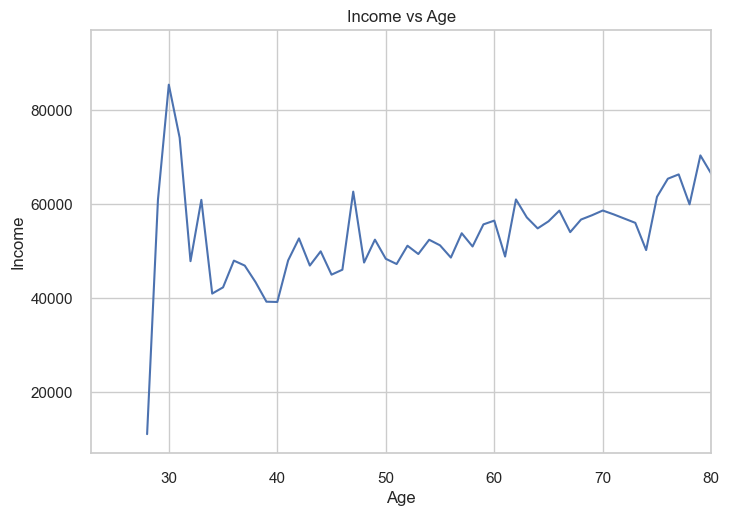

In [59]:
income_vs_age = sns.lineplot(x="Age", y="Income", data=df, ci=None)
income_vs_age.set(xlim=(None, 80), title='Income vs Age')
income_vs_age

<Axes: title={'center': 'Income vs Expenditure on Wine based on Education'}, xlabel='Income', ylabel='MntWines'>

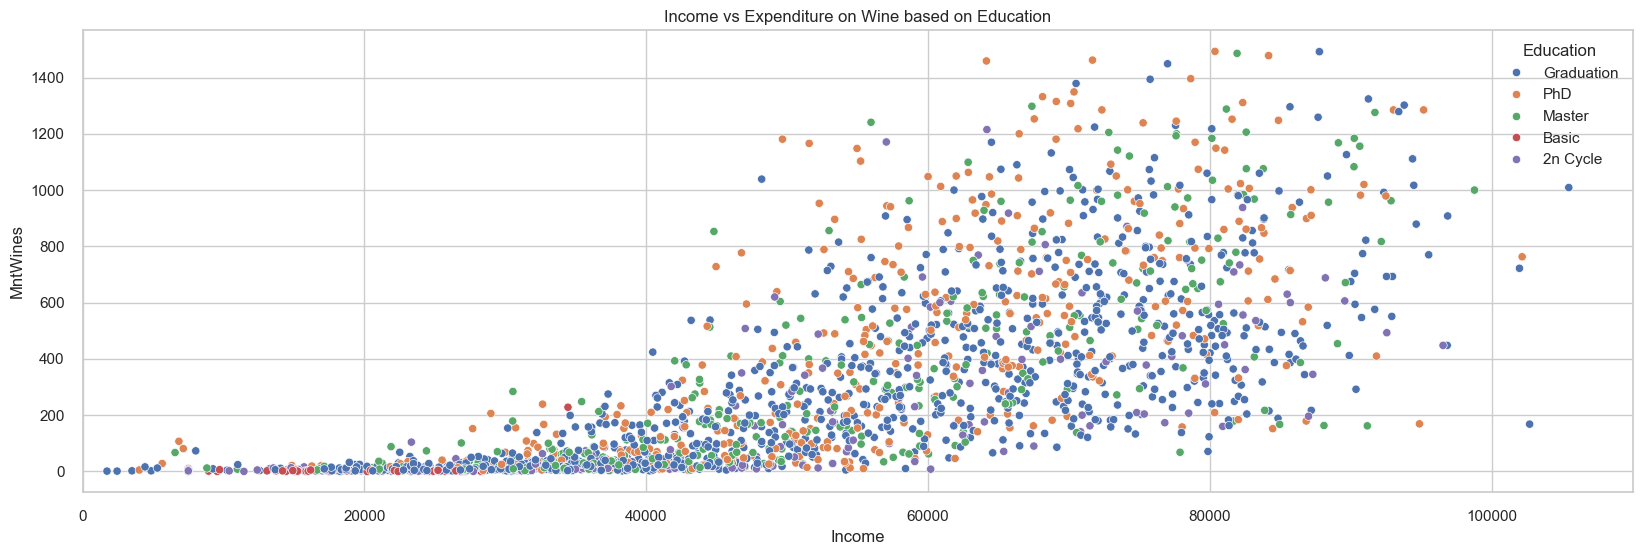

In [60]:
plt.figure(figsize=(20,6))
edu_vs_wine = sns.scatterplot(x="Income", y="MntWines", data=df, hue="Education")
edu_vs_wine.set(xlim=(0, 110000), title="Income vs Expenditure on Wine based on Education")
edu_vs_wine

<Axes: title={'center': 'Income vs Expenditure on Wine based on Kids at Home'}, xlabel='Income', ylabel='MntWines'>

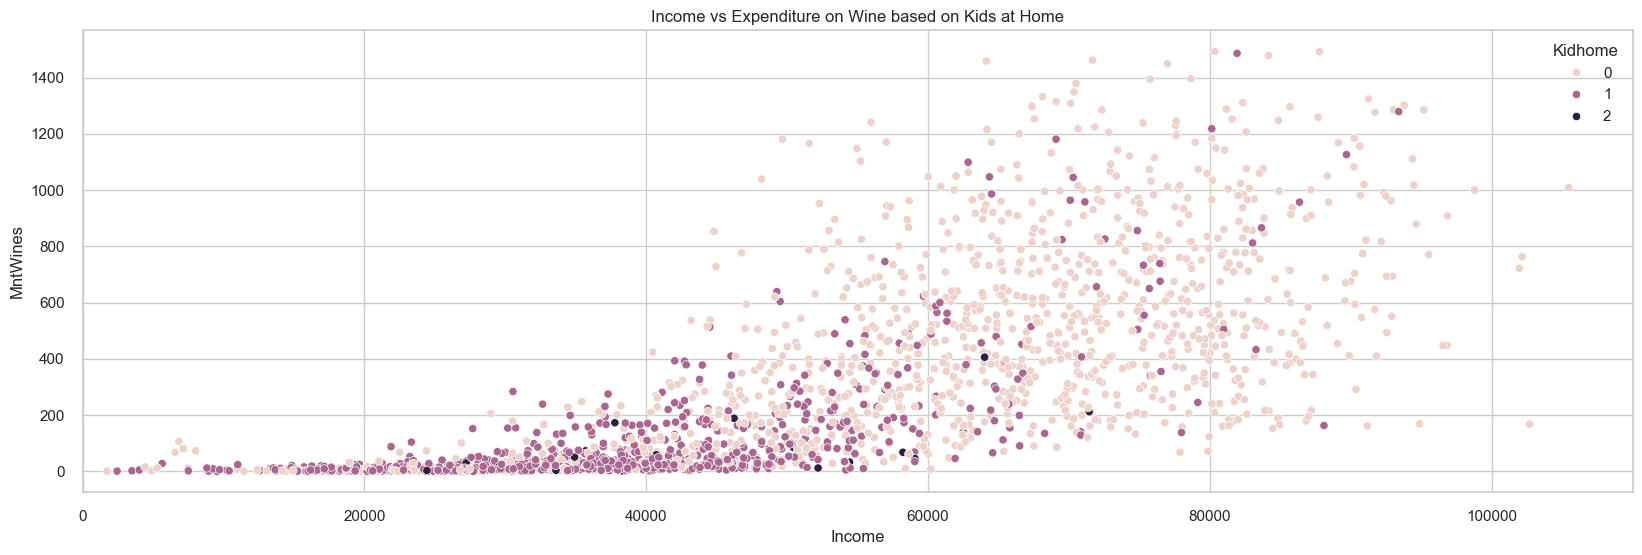

In [61]:
plt.figure(figsize=(20,6))
edu_vs_wine_kidhome = sns.scatterplot(x="Income", y="MntWines", data=df, hue="Kidhome")
edu_vs_wine_kidhome.set(xlim=(0, 110000), title="Income vs Expenditure on Wine based on Kids at Home")
edu_vs_wine_kidhome

##### In variable Year_Birth, it is known that there are 3 customers born in 1900 and below (outliers). I assume that this outlier data is a wrong data input because it is unlikely that there are customers over 100 years old. So I will drop this outlier data.

<Axes: title={'center': 'Income vs Expenditure on Gold'}, xlabel='Education', ylabel='MntGoldProds'>

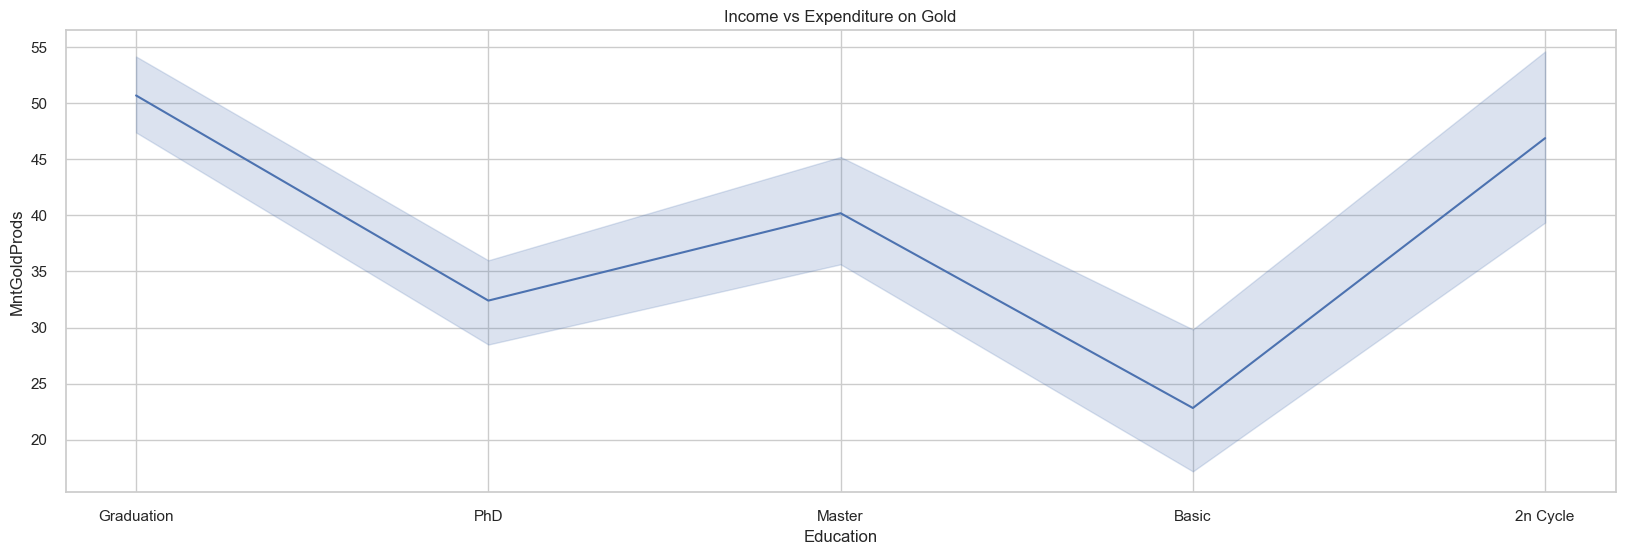

In [62]:
plt.figure(figsize=(20,6))
income_vs_gold = sns.lineplot(x="Education", y="MntGoldProds", data=df)
income_vs_gold.set(title="Income vs Expenditure on Gold")
income_vs_gold

## KMeans Clustering
##### The principle of KMeans Clustering is that the features be divided into K clusters in a way that each observation is belongs to the cluster having the nearest mean, or centroid. An important consideration for applying any clustering algorithm is to determine the 'k' that will yield the most accurate results. This can be done in many ways; some of the popular methods include:

##### The Elbow Method
##### The Silhouette Method

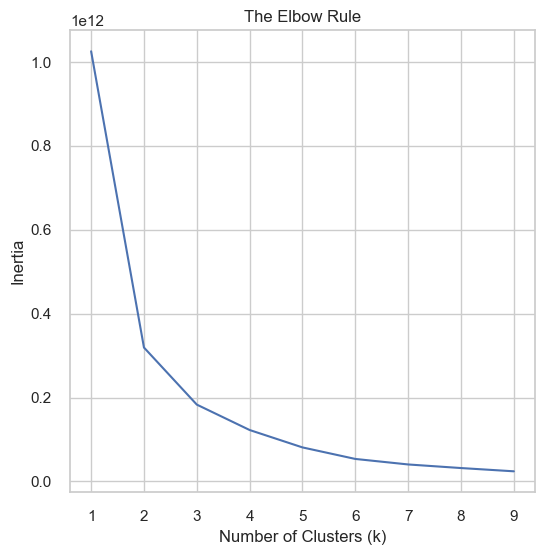

In [63]:
# Applying the Elbow method

inertias = []
possible_k_values = range(1,10)
features = ['Income', 'Total_Expenditure', 'Total_Purchases']

for k in possible_k_values:
   model = KMeans(k, random_state=20, init='k-means++').fit(clean_df[features])
   inertias.append(model.inertia_)


plt.figure(figsize=(6,6))    
plt.title("The Elbow Rule")
plt.plot(possible_k_values, inertias)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia');

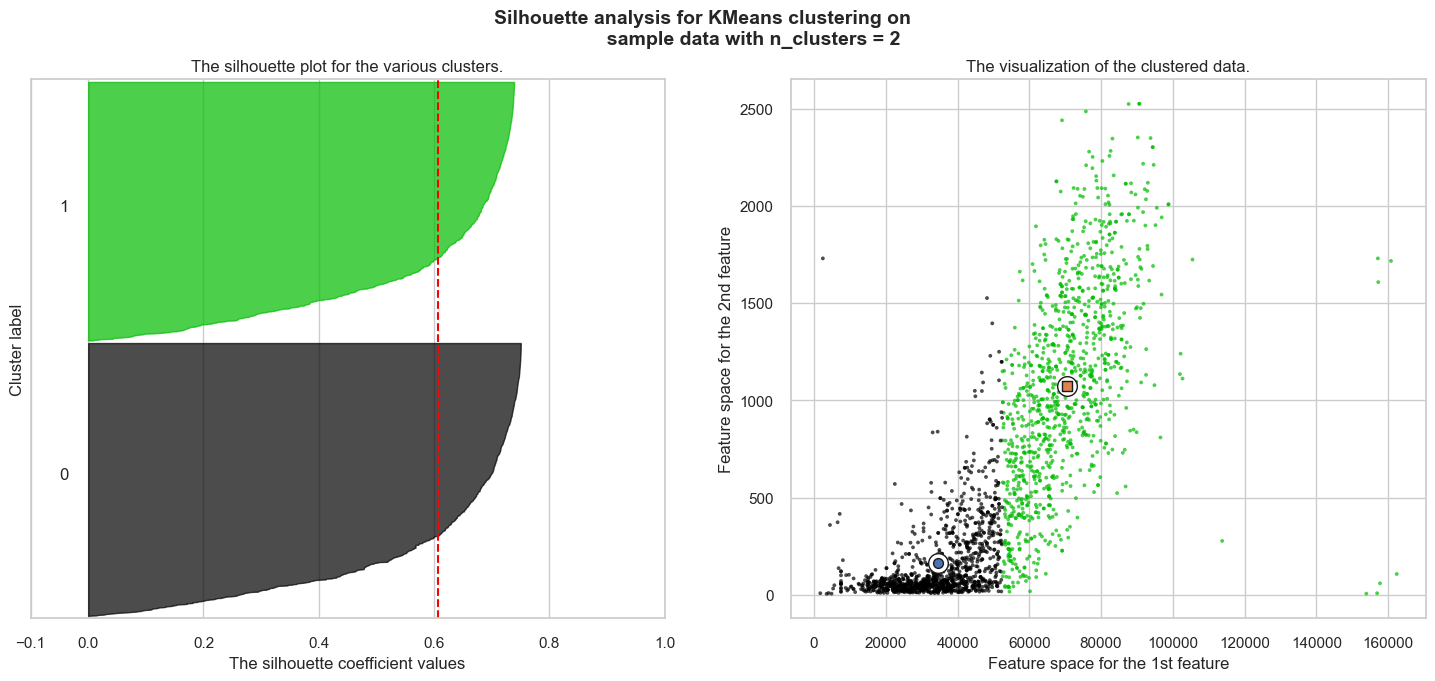

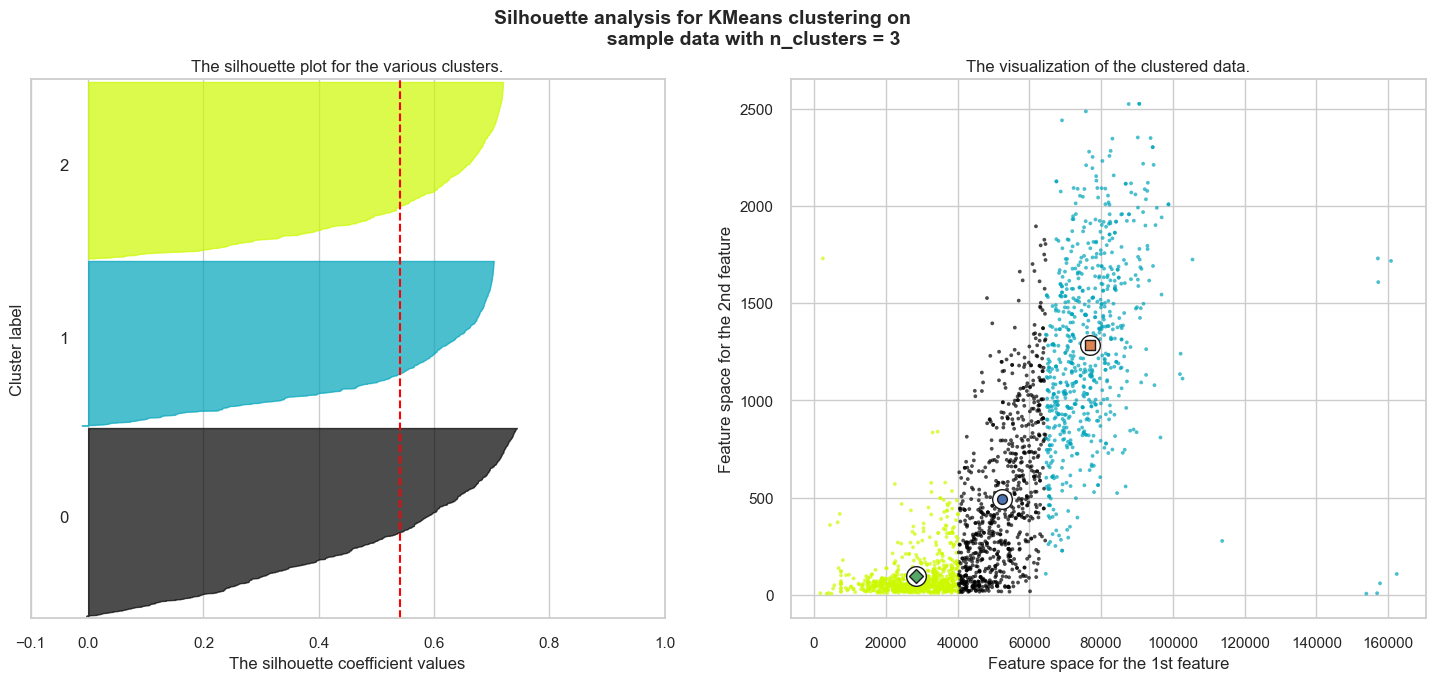

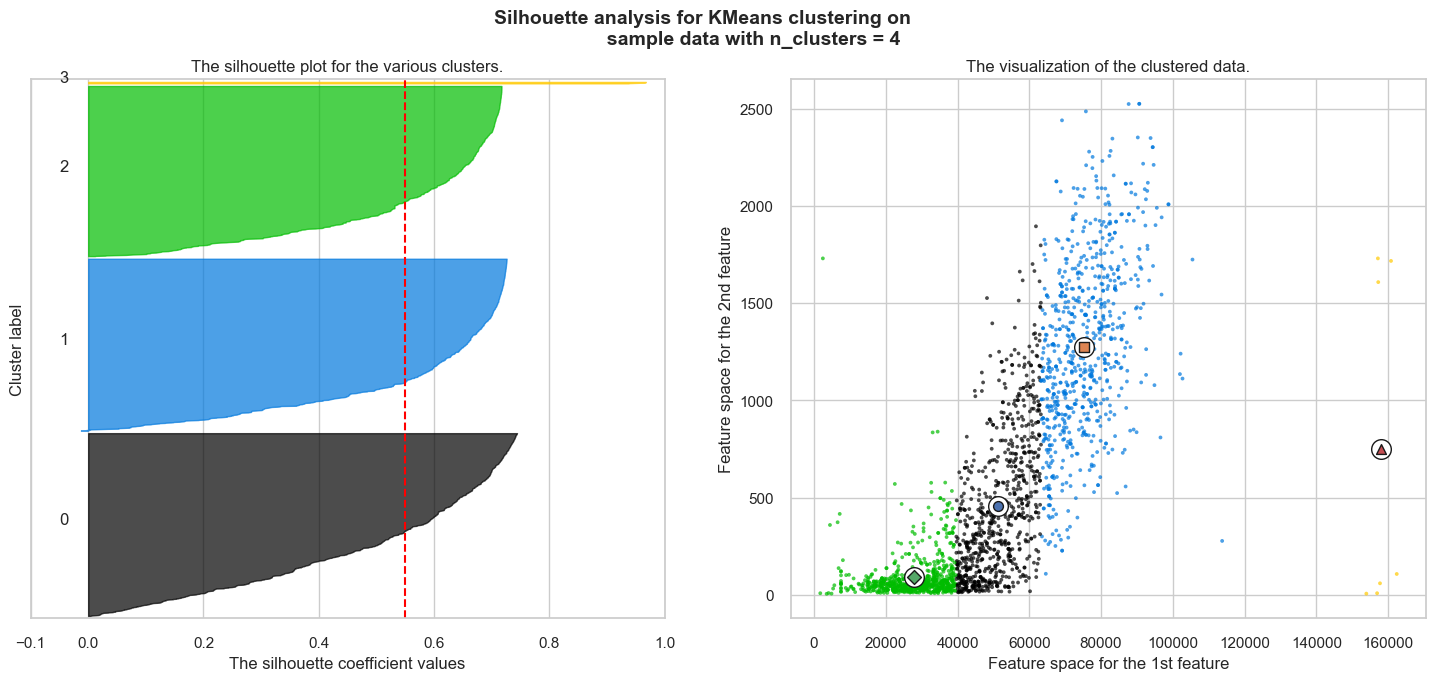

In [68]:
reduced_possible_k_values = range(2,5)
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', 'H', '8']

for k in reduced_possible_k_values:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(clean_df[features]) + (k + 1) * 10])

    model = KMeans(n_clusters=k, random_state=10)
    cluster_labels = model.fit_predict(clean_df[features])
    silhouette_avg = silhouette_score(clean_df[features], cluster_labels)
    sample_silhouette_values = silhouette_samples(clean_df[features], cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values, facecolor=color,
                          edgecolor=color, alpha=0.7,)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(clean_df[features].iloc[:, 0], clean_df[features].iloc[:, 1], 
                marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    centers = model.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white",
                alpha=1, s=200, edgecolor="k",)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=markers[i % len(markers)], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle('''Silhouette analysis for KMeans clustering on 
                  sample data with n_clusters = %d'''
                  % k, fontsize=14, fontweight="bold",)

plt.show()

### Analysis of Clustering Results

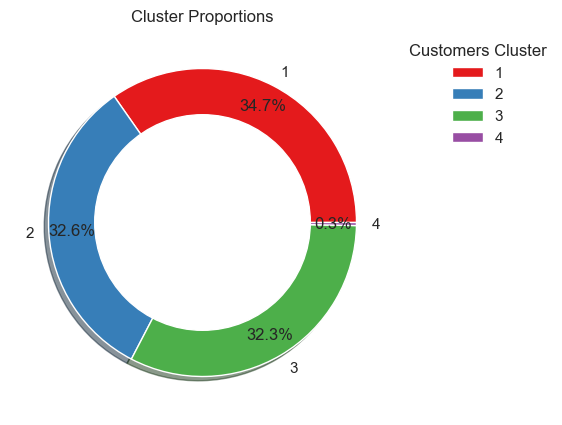

In [69]:
preds = model.predict(clean_df[features])
clusters = clean_df.copy()
clusters['Cluster'] = preds + 1

cluster_size = dict(clusters['Cluster'].value_counts())

plt.figure(figsize=(5, 5))
plt.title("Cluster Proportions")
plt.pie(cluster_size.values(), labels=sorted(cluster_size.keys()), 
        autopct="%.1f%%", pctdistance=0.85, shadow=True, 
        colors=sns.color_palette("Set1"))
plt.legend(title="Customers Cluster", labels=sorted(cluster_size.keys()), bbox_to_anchor=(1, 1))

donut = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.show()

C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\2987198025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=clusters, x='Cluster', y='Total_Purchases', palette=sns.color_palette("Set1"), showfliers=False)
C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\2987198025.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  ax = sns.boxplot(data=clusters, x='Cluster', y='Total_Purchases', palette=sns.color_palette("Set1"), showfliers=False)


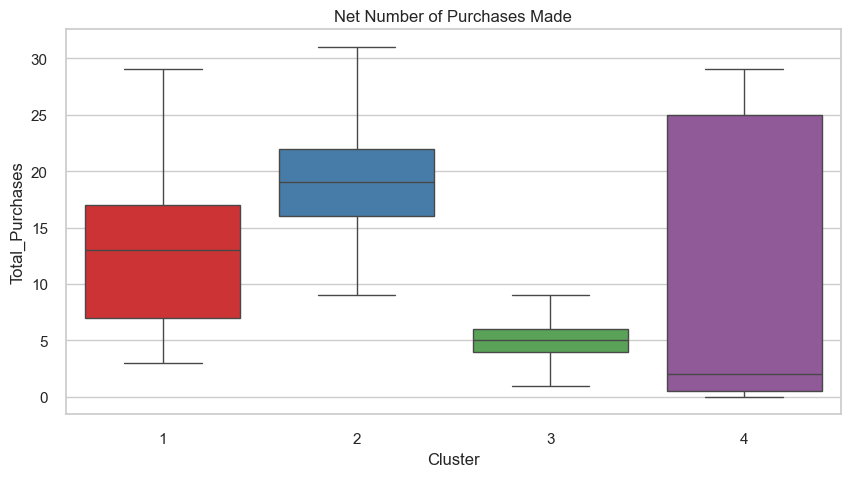

In [70]:
plt.figure(figsize=(10,5))
plt.title(f'Net Number of Purchases Made')
ax = sns.boxplot(data=clusters, x='Cluster', y='Total_Purchases', palette=sns.color_palette("Set1"), showfliers=False)
plt.show()

From the above box-whisker plots, we make the following inferences:

Cluster 1: Low amount of purchases
Cluster 2: Low amount of purchases
Cluster 3: Large amount of purchases
Cluster 4: Considerable amount of purchases

C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\1016255396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.boxplot(data=clusters, x='Cluster', y='Income', palette=sns.color_palette("Set1"), showfliers=False)
C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\1016255396.py:3: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  axes = sns.boxplot(data=clusters, x='Cluster', y='Income', palette=sns.color_palette("Set1"), showfliers=False)


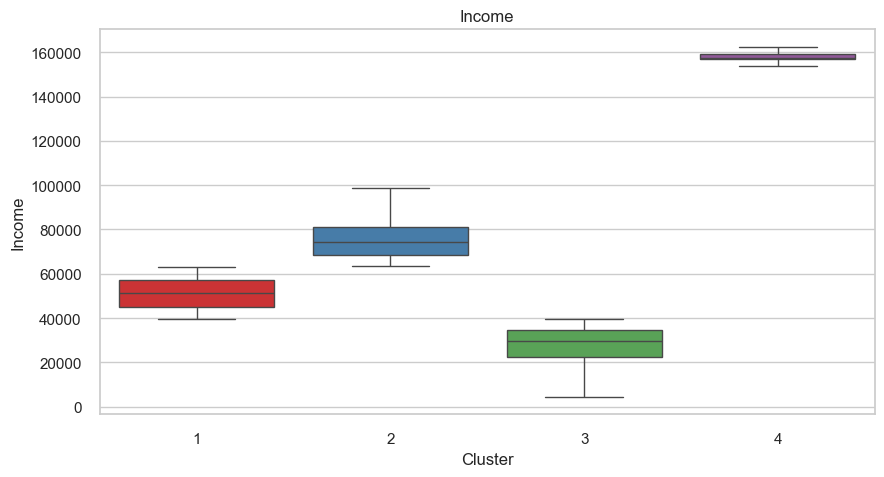

In [71]:
plt.figure(figsize=(10,5))
plt.title(f'Income')
axes = sns.boxplot(data=clusters, x='Cluster', y='Income', palette=sns.color_palette("Set1"), showfliers=False)
plt.show()

From the above box-whisker plots, we make the following inferences:

Cluster 1: Medium income

Cluster 2: Low Income

Cluster 3: High income

Cluster 4: Very high income

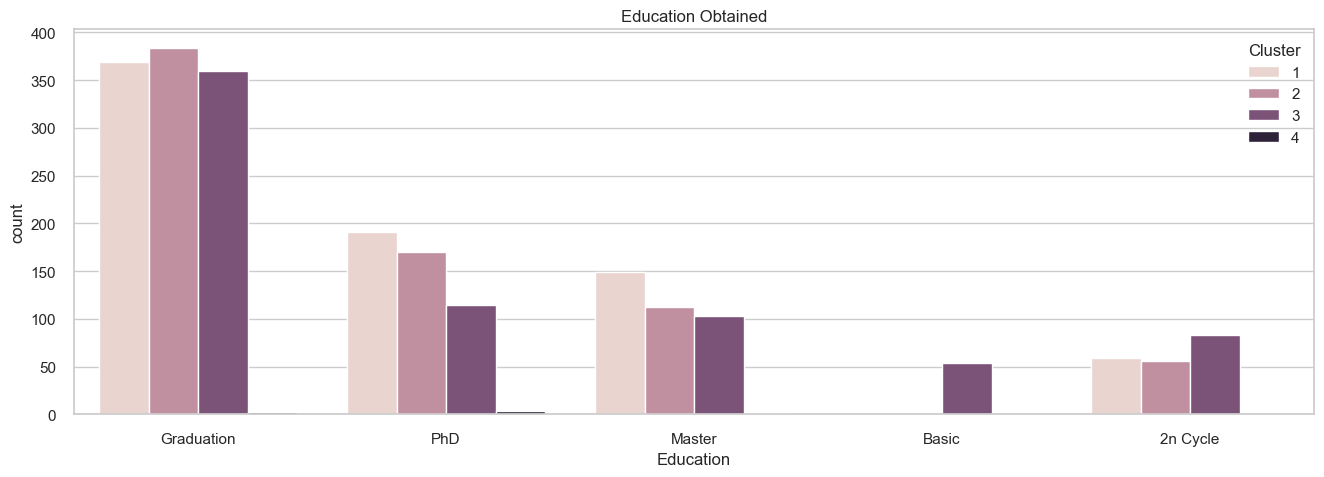

In [72]:
plt.figure(figsize=(16,5))
plt.title(f'Education Obtained')
sns.countplot(data=clusters, x='Education', hue='Cluster')
plt.show()

Graduation: Cluster 4

PhD Scholars: Cluster 4

Masters Holders: Cluster 1

Basic Education: Cluster 3

2nd Cycle (European Masters): Cluster 3

C:\Users\kanis\AppData\Local\Temp\ipykernel_13088\4294952192.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


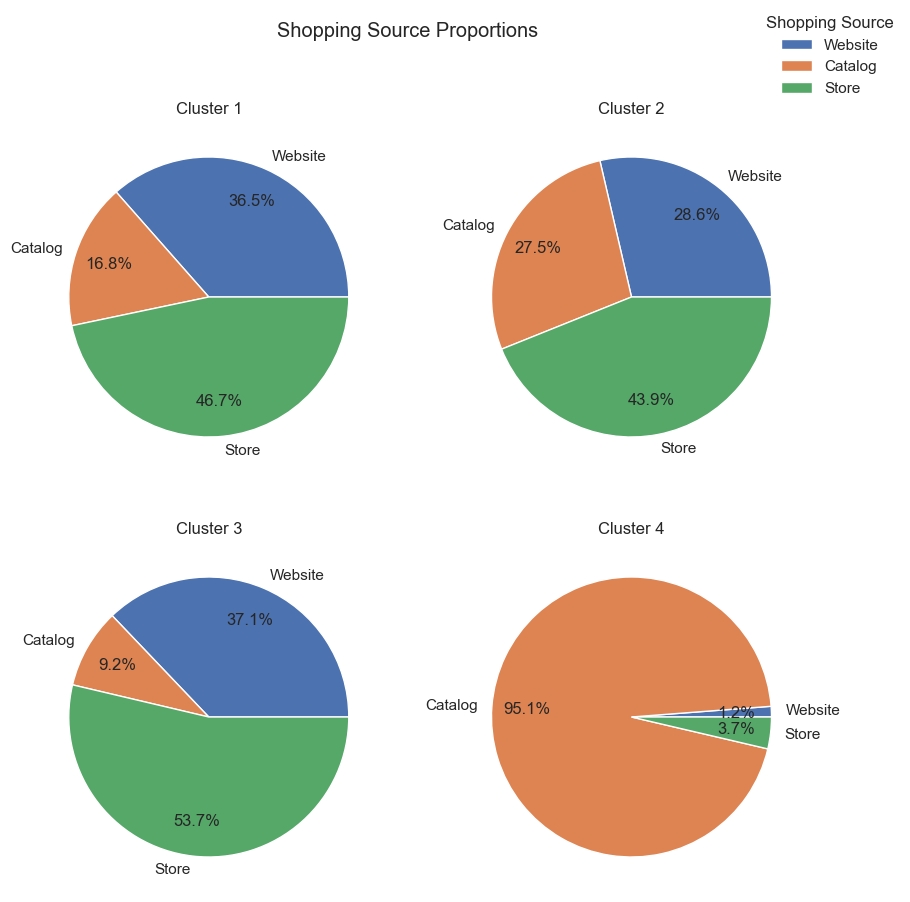

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))   
k = 0
for i in range(0, 2):
    for j in range(0, 2):
        k += 1
        num = clusters.query(f'Cluster == {k}').filter(regex='Num[^Deals|Total].+Purchases').sum(axis=0)
        sizes = dict(num)
        axes[i,j].set_title(f"Cluster {k}")
        axes[i,j].pie(sizes.values(), labels=['Website', 'Catalog', 'Store'], autopct="%.1f%%", pctdistance=0.75)

fig.suptitle('Shopping Source Proportions')
fig.legend(title="Shopping Source", labels=['Website', 'Catalog', 'Store'], bbox_to_anchor=(1,1)) 
fig.show()

### KMeans Customer Analysis
##### Platinum Customers: Cluster 4 (Highly educated, very high income, mostly buy from the store)
##### Diamond Customers: Cluster 3 (Well educated, high income, mostly buy from the store)
##### Gold Customers: Cluster 1 (Educated, medium income, highest website purchases)
##### Silver Customers: Cluster 2 (Comaparatively lesser education, low income, highest catalog purchases)
##### Despite the increasing popularity of online shopping and e-commerce, most customers tend to purchase items from the shop. Running a shop can prove to be expensive due to added costs like rent, electricity, staffing, interiors, maintenance, etc. E-commerce is comparatively cheaper, and therefore, the company must focus on expanding its online presence, and bring in customers by introducing schemes that will attract them to online shopping.

### Classification
##### Classification is a supervised machine learning technique in which we determine if an instance belongs to a certain category based on the features of that instance. There are two types of classification:

##### Binomial Classification: The instance can belong to one of two classes; for instance, 'will rain today' and 'will not rain today' are the only two possibilities that can occur, so any day will certainly belong to one of them.
##### Multinomial Classification: The instance can belong to one of many classes; for instance, classifying the species of a flower.

In [75]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import matplotlib.pyplot as plt
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [76]:
df['Childhome'] = df['Kidhome'] + df['Teenhome']
df['Total_Accepted_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] \
                            + df['AcceptedCmp4'] + df['AcceptedCmp5']
train_df = df.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Kidhome', 
                    'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                   'AcceptedCmp4', 'AcceptedCmp5'], axis=1)
col_mask=train_df.isnull().any(axis=0) 
row_mask=train_df.isnull().any(axis=1)
#train_df.loc[row_mask,col_mask]

In [77]:
train_df[train_df == np.inf]=np.nan
train_df.fillna(train_df.median(), inplace=True)
#train_df.loc[row_mask,col_mask]

#### The XGBoost Classifier was initialised after the data was split into train and test data with respect to the total number of campaigns accepted by each customer. The test data size considered in this case was 20% of the original data.

#### The data was first trained with respect to the number of purchases made during during sales or deals.

In [79]:
# Check the unique values in the target variable
unique_values = train_df['NumDealsPurchases'].unique()
print("Unique values in 'NumDealsPurchases':", unique_values)

# Mapping classes to a consistent range if necessary
expected_classes = np.arange(0, 16)  # Example range [0, 15]
if not np.array_equal(np.sort(unique_values), expected_classes):
    # Mapping the classes
    mapping = {old_class: new_class for new_class, old_class in enumerate(np.sort(unique_values))}
    train_df['NumDealsPurchases'] = train_df['NumDealsPurchases'].map(mapping)

# Splitting the data
X, y = train_df.loc[:, train_df.columns != 'NumDealsPurchases'], train_df['NumDealsPurchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Training the model
model = XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Unique values in 'NumDealsPurchases': [ 3  2  1  5  4 15  7  6  9  0  8 10 13 11 12]
Accuracy: 59.46%


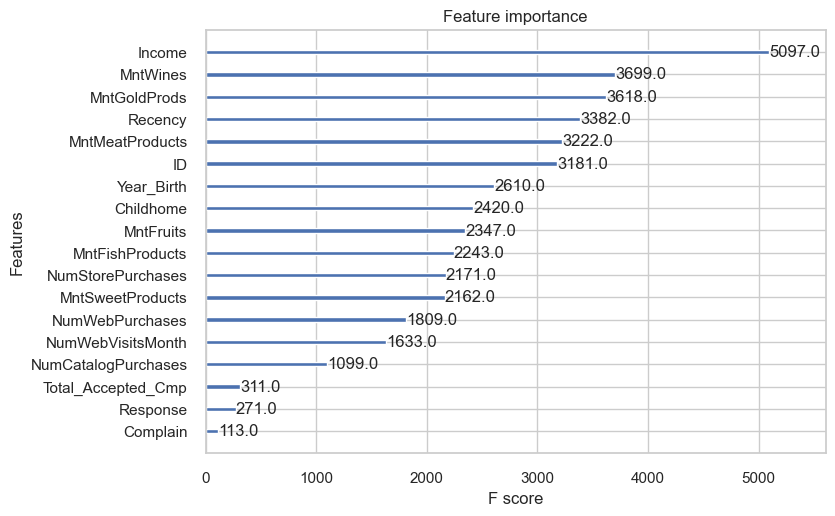

In [80]:
plot_importance(model)
plt.show()

##### We receive a poor accuracy score of 59.46%. There seems to be no significant relationship between the number of accepted campaigns by the customer, and the number of purchases they made during deals season.

In [82]:
X, y = train_df.loc[:, train_df.columns != 'Total_Accepted_Cmp'], train_df['Total_Accepted_Cmp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.53%


##### A decent accuracy score of 81.53% was achieved. The feature-wise impact on the accuracy score has been detailed below using the plot_importance function which is a part of the XGBoost model.

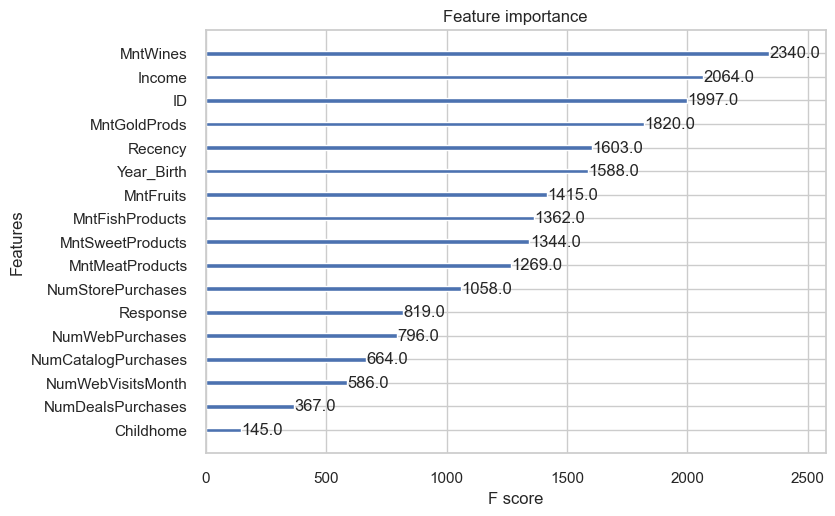

In [83]:
plot_importance(model)
plt.show()

##### From this visual, we are able to observe that the amount of money a customer spends on wine is a factor that hugely impacts the total number of campaigns the customer accepts. A close second factor is the income of the customer.

In [84]:
thresholds = sort(model.feature_importances_)
for threshold in thresholds:
    selection = SelectFromModel(model, threshold=threshold, prefit=True)
    select_X_train = selection.transform(X_train)
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (threshold, select_X_train.shape[1], accuracy*100.0))

D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=19, Accuracy: 80.63%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=19, Accuracy: 80.63%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=17, Accuracy: 80.63%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.041, n=16, Accuracy: 80.63%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.043, n=15, Accuracy: 80.63%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.043, n=14, Accuracy: 79.50%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.045, n=13, Accuracy: 79.50%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.045, n=12, Accuracy: 79.05%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.045, n=11, Accuracy: 79.50%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.045, n=10, Accuracy: 79.28%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.049, n=9, Accuracy: 79.05%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.051, n=8, Accuracy: 79.28%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.051, n=7, Accuracy: 80.86%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.052, n=6, Accuracy: 78.15%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.061, n=5, Accuracy: 79.05%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.068, n=4, Accuracy: 79.05%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.071, n=3, Accuracy: 79.28%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.111, n=2, Accuracy: 78.83%
Thresh=0.139, n=1, Accuracy: 79.73%


D:\Users\kanishk\Python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


##### By iteratively considering the number of features and comparing their accuracies, we are able to notice a decrease in the accuracy of the model with the number of features.

In [98]:
from sklearn.tree import export_graphviz
import shap 
import graphviz 

In [102]:
import shap
import graphviz
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assuming your model and data are already defined
# Example model and data setup
# X, y = train_df.loc[:, train_df.columns != 'NumDealsPurchases'], train_df['NumDealsPurchases']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
# model = xgb.XGBClassifier(learning_rate=0.05, n_estimators=300, max_depth=5)
# model.fit(X_train, y_train)

# Initialize JavaScript visualization for SHAP
shap.initjs()

# Create a SHAP explainer for the model
explainer = shap.Explainer(model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# For force_plot, visualize a single instance
instance_index = 0

# Ensure we are handling the multi-class output correctly
# shap_values.values is an array of shape (n_samples, n_classes, n_features)
# To visualize the SHAP values for a specific class (e.g., class 0)
class_index = 0

# Extract the SHAP values for the specific instance and class
instance_shap_values = shap_values[instance_index, :, class_index]

# Plot the SHAP values using force_plot
shap.force_plot(shap_values.base_values[instance_index, class_index], instance_shap_values.values, X_test.iloc[instance_index])

100%|===================| 2214/2220 [01:00<00:00]        

### Analysis of SHAP Results
We can see from the bar plot that the amount of money a customer spends on wine is a huge determining factor of the campaigns they accept. It is possible that a lot of campaigns have been run for the alcoholic beverage department. It has been found earlier that families with children at home spend lesser money on wine - however, food items are a necessity. Running more campaigns on fruits and fish products will certainly be advantageous to more customers, thereby increasing profits.

Another noticeable observation is that the number of purchases made during deals has a very small impact on the total number of campaigns accepted. This may be an indication of lesser promotion of deals. By advertising deals, more customers will be interested in making purchases.

Finally, it would be helpful to increase the internet presence of the company, as the number of purchases made from the website impacts the accepted campaigns very less.